In [165]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn import preprocessing
from sklearn import metrics

In [250]:
# Ignoring SKlean errors
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

## Reading the Data 

In [130]:
df = pd.read_csv('StockX-ML-Data.csv', parse_dates=True)

df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Percent Change,Days Since Release,Original Release
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,9/24/16,11.0,California,398.636364,1665,0
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,11/23/16,11.0,California,211.363636,1605,0
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,11/23/16,11.0,California,213.636364,1605,0
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,11/23/16,11.5,Kentucky,388.636364,1605,0
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2/11/17,11.0,Rhode Island,276.363636,1525,0


## Data Preprocessing

In [131]:
# Label encoding the states to have values from 0 - 49
# Instatniate LabelEncoder
label_encoder = LabelEncoder()

# LabelEncode
df['Buyer Region'] = label_encoder.fit_transform(df['Buyer Region']) # CA, NY, etc.
df['Color'] = label_encoder.fit_transform(df['Sneaker Name']) # Colorway
df['Brand'] = label_encoder.fit_transform(df['Brand']) # Yeezy, Nike


In [133]:
# Parsing date times and creating month column
df['Order Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True)
df['Month'] = pd.DatetimeIndex(df['Order Date']).month
df['Year'] = pd.DatetimeIndex(df['Order Date']).year

# Calculating the Days Since Release
df['Days Since Release'] = pd.to_datetime(df['Order Date']) - pd.to_datetime(df['Release Date'])
df['Days Since Release'] = df['Days Since Release'].dt.days.astype('int16')
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Percent Change,Days Since Release,Original Release,Color,Month,Year
0,2017-09-01,0,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,9/24/16,11.0,4,398.636364,342,0,5,9,2017
1,2017-09-01,0,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,11/23/16,11.0,4,211.363636,282,0,8,9,2017
2,2017-09-01,0,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,11/23/16,11.0,4,213.636364,282,0,9,9,2017
3,2017-09-01,0,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,11/23/16,11.5,17,388.636364,282,0,10,9,2017
4,2017-09-01,0,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2/11/17,11.0,39,276.363636,202,0,11,9,2017


## Data Visualization

Text(0, 0.5, 'Percent Change')

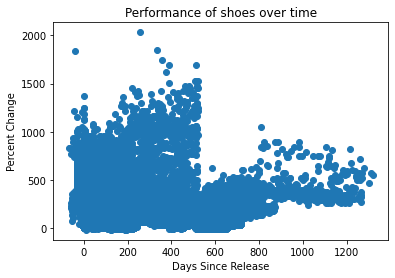

In [136]:
plt.scatter(df['Days Since Release'], df['Percent Change'])

plt.title('Performance of shoes over time')
plt.xlabel('Days Since Release')
plt.ylabel('Percent Change')

## Linear Regression
#### Given a shoe's information, can we predict its resale price?

In [10]:
# Retrieving feature data and target variable
X = df[['Brand', 'Retail Price', 'Shoe Size', 'Buyer Region', 'Color', "Days Since Release", "Original Release", 'Month', 'Year']]

y = df['Sale Price']

# Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Linear Regression

Plain old linear regression to start us off.

In [ ]:
def linregression_model(X_train, y_train, X_test, y_test):
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, y_train.ravel())
    y_hat_train = linear_regression.predict(X_train)
    acc_train = r2_score(y_train, y_hat_train)
    print("Accuracy on training data (r^2): %f" % acc_train)
    y_hat_test = linear_regression.predict(X_test)
    acc_test = r2_score(y_test, y_hat_test)
    print("Accuracy on testing data (r^2): %f" % acc_test)
    print()

In [ ]:
linregression_model(X_train, y_train, X_test, y_test)

Accuracy on training data (r^2): 0.449009
Accuracy on testing data (r^2): 0.458227



## Linear Regression using Lasso Regularization

We will set it up so that it takes in different cost values

In [ ]:
acc_train_lassoreg = [] 
acc_test_lassoreg = []
c_lassoreg = []

def lassoregression_model(C, X_train, y_train, X_test, y_test):
    lassoreg = Lasso(alpha=C)
    lassoreg.fit(X_train, y_train.ravel())
    y_hat_train = lassoreg.predict(X_train)
    acc_train = r2_score(y_train, y_hat_train)
    acc_train_lassoreg.append(acc_train)
    print("Alpha = ", c)
    print("Accuracy on training data (r^2): %f" % acc_train)
    y_hat_test = lassoreg.predict(X_test)
    acc_test = r2_score(y_test, y_hat_test)
    acc_test_lassoreg.append(acc_test)
    print("Accuracy on testing data (r^2): %f" % acc_test)
    print()
    c_lassoreg.append(C)

In [ ]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for c in cVals:
    lassoregression_model(c, X_train, y_train, X_test, y_test)

Alpha =  0.0001
Accuracy on training data (r^2): 0.449009
Accuracy on testing data (r^2): 0.458227

Alpha =  0.001
Accuracy on training data (r^2): 0.449009
Accuracy on testing data (r^2): 0.458227

Alpha =  0.01
Accuracy on training data (r^2): 0.449007
Accuracy on testing data (r^2): 0.458221

Alpha =  0.1
Accuracy on training data (r^2): 0.448858
Accuracy on testing data (r^2): 0.458011

Alpha =  1
Accuracy on training data (r^2): 0.447472
Accuracy on testing data (r^2): 0.456474

Alpha =  10
Accuracy on training data (r^2): 0.422821
Accuracy on testing data (r^2): 0.432157



In [137]:
plt.plot(c_lassoreg, acc_train_lassoreg, 'bo-') 
plt.plot(c_lassoreg, acc_test_lassoreg,'ro-') 
plt.xlabel("Alpha parameter")
plt.ylabel("r^2")
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

NameError: ignored

## Linear Regression using Ridge Regularization

We will use the same alpha values as the previous lasso version

In [ ]:
acc_train_ridgereg = []
acc_test_ridgereg = []
c_ridgereg = []

def ridgereg_model(C, X_train, y_train, X_test, y_test):
    ridgereg = Ridge(alpha=C)
    ridgereg.fit(X_train, y_train.ravel())
    y_hat_train = ridgereg.predict(X_train)
    acc_train = r2_score(y_train, y_hat_train)
    acc_train_ridgereg.append(acc_train)
    print("alpha = ", C)
    print("Accuracy on training data (r^2): %f" % acc_train)
    y_hat_test = ridgereg.predict(X_test)
    acc_test = r2_score(y_test, y_hat_test)
    acc_test_ridgereg.append(acc_test)
    print("Accuracy on testing data (r^2): %f" % acc_test)
    print()
    c_ridgereg.append(C)


In [ ]:
for c in cVals:
    ridgereg_model(c, X_train, y_train, X_test, y_test)

alpha =  0.0001
Accuracy on training data (r^2): 0.449009
Accuracy on testing data (r^2): 0.458227

alpha =  0.001
Accuracy on training data (r^2): 0.449009
Accuracy on testing data (r^2): 0.458227

alpha =  0.01
Accuracy on training data (r^2): 0.449009
Accuracy on testing data (r^2): 0.458227

alpha =  0.1
Accuracy on training data (r^2): 0.449009
Accuracy on testing data (r^2): 0.458227

alpha =  1
Accuracy on training data (r^2): 0.449009
Accuracy on testing data (r^2): 0.458226

alpha =  10
Accuracy on training data (r^2): 0.448984
Accuracy on testing data (r^2): 0.458186



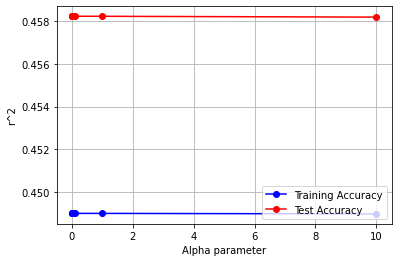

In [ ]:
plt.plot(c_ridgereg, acc_train_ridgereg, 'bo-') 
plt.plot(c_ridgereg, acc_test_ridgereg,'ro-') 
plt.xlabel("Alpha parameter")
plt.ylabel("r^2")
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

## Logistic Regression using Lasso Regularization

Given a shoe, can we predict if its resale price doubled in price (with respect to its original retail price)?


In [277]:
# Slicing off the first 1,250 rows
# Retrieving feature data and target variable
X = df[['Retail Price', 'Shoe Size', 'Buyer Region', 'Days Since Release', 'Original Release', 'Color', 'Month', 'Year']].to_numpy()
y = df[['Brand']].to_numpy()

# Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train = y_train.reshape((y_train.shape[0]), 1)


In [282]:
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []

In [283]:
def logreg_lasso_model(c, X_train, y_train, X_test, y_test):
  # Instantiating a LogisticRegression instance
  logistic_regression = LogisticRegression(C=c,penalty='l1', warm_start=True, solver='saga')

  logistic_regression.fit( X_train, y_train )
  y_hat_train = logistic_regression.predict( X_train )

  acc_train = np.mean(y_hat_train == y_train)
  acc_train_logreg.append( acc_train )

  print('C =',c)
  print('Accuracy on training data = %f'% acc_train)
  y_hat_test = logistic_regression.predict(X_test)

  acc_test = np.mean(y_hat_test == y_test)
  acc_test_logreg.append(acc_test)
  print('Accuracy on testing data = %f \n'% acc_test)

  c_logreg.append(c)
  

In [284]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for c in cVals:
  logreg_lasso_model(c, X_train, y_train, X_test, y_test)

C = 0.0001
Accuracy on training data = 0.673527
Accuracy on testing data = 0.674673 

C = 0.001
Accuracy on training data = 0.673527
Accuracy on testing data = 0.674673 

C = 0.01
Accuracy on training data = 0.673527
Accuracy on testing data = 0.674673 

C = 0.1
Accuracy on training data = 0.673527
Accuracy on testing data = 0.674673 

C = 1
Accuracy on training data = 0.673527
Accuracy on testing data = 0.674673 

C = 10
Accuracy on training data = 0.673527
Accuracy on testing data = 0.674673 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

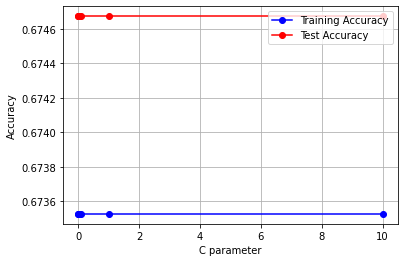

In [285]:
plt.plot(c_logreg, acc_train_logreg, 'bo-') 
plt.plot(c_logreg, acc_test_logreg,'ro-') 
plt.xlabel("C parameter")
plt.ylabel('Accuracy')
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

## Logistic Regression using Ridge Regularization

In [293]:
acc_train_logreg_ridge = []
acc_test_logreg_ridge = []
c_logreg_ridge = []

In [294]:
def logreg_ridge_model(c, X_train, y_train, X_test, y_test):
  logistic_regression = LogisticRegression(C=c, warm_start=True, max_iter=2000)
  logistic_regression.fit( X_train, y_train )
  y_hat_train = logistic_regression.predict( X_train )

  acc_train = np.mean(y_hat_train == y_train)
  acc_train_logreg_ridge.append( acc_train )

  print('C =',c)
  print('Accuracy on training data = %f'% acc_train)
  y_hat_test = logistic_regression.predict(X_test)

  acc_test = np.mean(y_hat_test == y_test)
  acc_test_logreg_ridge.append(acc_test)
  print('Accuracy on testing data = %f \n'% acc_test)

  c_logreg_ridge.append(c)

In [295]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for c in cVals:
  logreg_ridge_model(c, X_train, y_train, X_test, y_test)

C = 0.0001
Accuracy on training data = 0.673527
Accuracy on testing data = 0.674673 

C = 0.001
Accuracy on training data = 0.673527
Accuracy on testing data = 0.674673 

C = 0.01
Accuracy on training data = 0.673527
Accuracy on testing data = 0.674673 

C = 0.1
Accuracy on training data = 0.674157
Accuracy on testing data = 0.674673 

C = 1
Accuracy on training data = 0.674157
Accuracy on testing data = 0.674673 

C = 10
Accuracy on training data = 0.674157
Accuracy on testing data = 0.674673 



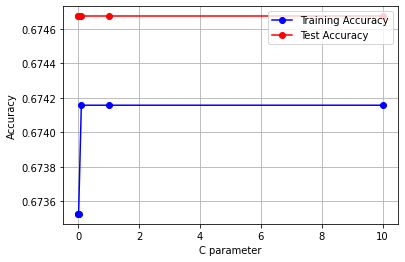

In [296]:
plt.plot(c_logreg_ridge, acc_train_logreg_ridge, 'bo-') 
plt.plot(c_logreg_ridge, acc_test_logreg_ridge,'ro-') 
plt.xlabel("C parameter")
plt.ylabel('Accuracy')
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

## Logistic Regression Using Polynomial Feature Transformation

In [297]:
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []

In [298]:
pft = PolynomialFeatures(degree=2)
X_train_transformed = pft.fit_transform(X_train)
X_test_transformed = pft.fit_transform(X_test)

In [299]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for c in cVals:
  print(c)
  logreg_lasso_model(c, X_train_transformed, y_train, X_test_transformed, y_test)

0.0001
C = 0.0001
Accuracy on training data = 0.673527
Accuracy on testing data = 0.674673 

0.001


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C = 0.001
Accuracy on training data = 0.673527
Accuracy on testing data = 0.674673 

0.01
C = 0.01
Accuracy on training data = 0.673527
Accuracy on testing data = 0.674673 

0.1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C = 0.1
Accuracy on training data = 0.673527
Accuracy on testing data = 0.674673 

1
C = 1
Accuracy on training data = 0.673527
Accuracy on testing data = 0.674673 

10
C = 10
Accuracy on training data = 0.673527
Accuracy on testing data = 0.674673 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


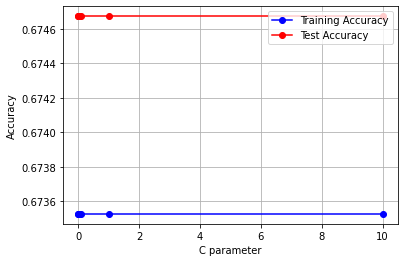

In [300]:
plt.plot(c_logreg, acc_train_logreg, 'bo-') 
plt.plot(c_logreg, acc_test_logreg,'ro-') 
plt.xlabel("C parameter")
plt.ylabel('Accuracy')
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

## Support Vector Machine

Given the independent variables - can we predict what brand the sold shoe was?

## SVM using Linear Kernel

In [ ]:
X = df[['Sale Price', 'Retail Price', 'Shoe Size', 
        'Buyer Region', 'Percent Change', 'Days Since Release', 
        'Original Release', 'Color', 'Month', 'Year']]

y = df['Brand']

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = preprocessing.scale(X_train)

X_test = preprocessing.scale(X_test)

In [ ]:
acc_train_svm_lin = []
acc_test_svm_lin = []
c_svm_lin = []

def svm_lin(c, X_train, y_train, X_test, y_test):
    svc_linear = svm.SVC(probability=False, kernel="linear", C=c)
    svc_linear.fit(X_train, y_train)
    y_hat_train = svc_linear.predict(X_train)
    acc_train = svc_linear.score(X_train, y_hat_train)
    acc_train_svm_lin.append(acc_train)
    print('Train Data Accuracy: {0:f}'.format(acc_train))
    y_hat_test = svc_linear.predict(X_test)
    acc_test = svc_linear.score(X_test, y_hat_test)
    acc_test_svm_lin.append(acc_test)
    print('Test Data Accuracy: {0:f}'.format(acc_test))
    print()
    c_svm_lin.append(c)


In [ ]:
for c in cVals:
    svm_lin(c, X_train, y_train, X_test, y_test)

KeyboardInterrupt: 

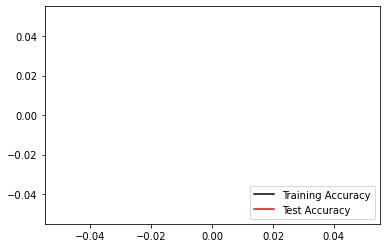

In [ ]:
plt.plot(c_svm_lin, acc_train_svm_lin, c="black")
plt.plot(c_svm_lin, acc_test_svm_lin, c="red")

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

## SVM using Radial Basis Function (RBF) Kernel

In [ ]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []

def svm_rbf(c, X_train, y_train, X_test, y_test):
    svc_rbf = svm.SVC(probability=False, kernel="rbf", C=c)
    svc_rbf.fit(X_train, y_train)
    y_hat_train = svc_rbf.predict(X_train)
    acc_train = svc_rbf.score(X_train, y_hat_train)
    acc_train_svm_rbf.append(acc_train)
    print('Train Data Accuracy: {0:f}'.format(acc_train))
    y_hat_test = svc_rbf.predict(X_test)
    acc_test = svc_rbf.score(X_test, y_hat_test)
    acc_test_rbf.append(acc_test)
    print('Test Data Accuracy: {0:f}'.format(acc_test))
    print()
    c_svm_rbf.append(c)

In [ ]:
for c in cVals:
    svm_rbf(c, X_train, y_train, X_test, y_test)

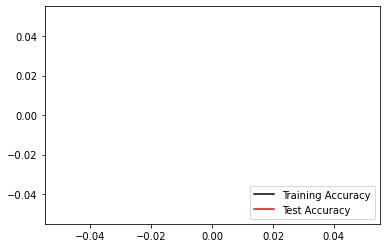

In [ ]:
plt.plot(c_svm_rbf, acc_train_svm_rbf, c="black")
plt.plot(c_svm_rbf, acc_test_svm_rbf, c="red")

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [ ]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

def svm_poly(c, X_train, y_train, X_test, y_test):
    pass

In [ ]:
cVals = np.geomspace(0.000001, 0.001, 6)
for c in cVals:
    svm_poly(c, X_train, y_train, X_test, y_test)

In [ ]:
plt.plot(c_svm_poly, acc_train_svm_poly, c="black")
plt.plot(c_svm_poly, acc_test_svm_poly, c="red")

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')